In [27]:
from selenium.webdriver import Firefox
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import selenium.webdriver.support.ui as ui
from selenium import webdriver
from time import sleep
import time
import csv

In [40]:
class post:
    def __init__(self, post_class, title, contents):
        self.post_class = post_class
        self.title = title
        self.contents = contents
    
    def __str__(self):
        return self.contents

In [41]:
def scrape_post(wait, url, post_class, retry=3, timeout=10):
    for i in range(0, retry):
        driver.get(url)
        sleep(1)
        try:
            wait.until(lambda driver:EC.presence_of_element_located((By.CLASS_NAME, post_title_class_name)))
            wait.until(lambda driver:EC.presence_of_element_located((By.CLASS_NAME, content_box_class_name)))

            title = driver.find_element_by_class_name(post_title_class_name).text
            contents = driver.find_elements_by_class_name(content_box_class_name)
            return post(post_class, title, ' '.join([content.text.replace('\n', ' ') for content in contents]))
        
        except TimeoutException:
            return None
        except Exception as e:
            print(e)
            continue
    
    return None

In [42]:
post_title_class_name = r'Post_title_2O-1el'
content_box_class_name = r'Post_content_NKEl9d'

In [39]:
driver = webdriver.Chrome('../project/chromedriver.exe')
wait = WebDriverWait(driver, timeout=10)

post_url = r'https://www.dcard.tw/f/girl/p/230578450'
post = scrape_post(wait, post_url, 'girl', timeout=10)

if post is not None:
    print(post)

driver.quit()

girl
#更【插圖做運動】經期舒緩方法
前情提要 #分享 每天30分鐘，跟著插圖做運動！ 1/21更，天呀！謝謝大家這麼溫馨溫暖，給了好多回饋！️，馬上跑去跟朋友分享這些回饋（太暖了！），如果喜歡她的圖的女孩，可以到這些地方看更多可愛的運動插畫唷！，fb：IG：gumudesign，網站： 上次跟大家分享了可愛的運動插畫，謝謝女孩們的喜歡，大家都太溫馨了 ❤️ 所以我慫（強）恿（迫）朋友來回饋給大家啦！XD 讓她把「月經瑜珈」畫成動作圖，容易經痛的女孩們，不妨試試看這個動作！ 這次順便想推推月經懶人包，因為我自己是超容易經痛的女孩，接近經期的前一週，別說是冰，我連有點冰的水果都不敢吃QQ，每次來幾乎都會吃止痛藥，不然痛起來真的沒辦法做事QQ  由於圖很多，我就不全放上來啦～想看詳細的內容的女孩，再自己去逛囉～ FB： https://www.facebook.com/gumu.design/ IG：gumudesign  不曉得大家平常都如何減緩經痛？我是超敏感的類型，主要都是戒冰，冰品真的是我的大忌，喝一杯冰飲料馬上就會gg， 也很羨慕身邊不怕吃冰經痛的朋友QQ（吃貨真的超級無敵羨慕）真的很痛的時候，絕對就是熱敷＋止痛藥，但飲食如喝薑茶、紅豆湯等，對我的效果就蠻小的，不如直接吃一顆止痛藥啊～ 月經 經痛 舒緩 運動 懶人包


In [70]:
def scrape_subreddit(driver, subreddit_name, retry=3, timeout=10):
    """ Scrape info of all jobs related to the specified keyword
    :param keyword: google job search keyword.
    :param wait: contains timeout.
    :param urls: urls cache.
    :param start: the number of the record to start scraping.
    """
    wait = WebDriverWait(driver, timeout=timeout)
    
    # Open the subreddit
    web_url = 'https://www.dcard.tw/f/'+subreddit_name
    print(web_url)
    driver.get(web_url);
    sleep(2)
    
    wait.until(lambda driver:EC.presence_of_element_located((By.CLASS_NAME,'PostList_entry_1rq5Lf')))
    tem =driver.find_elements_by_class_name('PostList_entry_1rq5Lf')
    urls=[]
    for a in tem[:30]:
        b=a.find_elements_by_class_name('PostEntry_root_V6g0rd')
        urls.append(b[0].get_attribute('href'))
    
    return [scrape_post(wait, url, subreddit_name) for url in urls[1:]]

In [71]:
driver = webdriver.Chrome('../project/chromedriver.exe')

boy_posts = scrape_subreddit(driver, 'boy')
girl_posts = scrape_subreddit(driver, 'girl')
print('done')

driver.quit()

https://www.dcard.tw/f/boy
https://www.dcard.tw/f/girl
Message: no such element: Unable to locate element: {"method":"class name","selector":"Post_title_2O-1el"}
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.45.615291 (ec3682e3c9061c10f26ea9e5cdcf3c53f3f74387),platform=Windows NT 10.0.17134 x86_64)

Message: no such element: Unable to locate element: {"method":"class name","selector":"Post_title_2O-1el"}
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.45.615291 (ec3682e3c9061c10f26ea9e5cdcf3c53f3f74387),platform=Windows NT 10.0.17134 x86_64)

Message: no such element: Unable to locate element: {"method":"class name","selector":"Post_title_2O-1el"}
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.45.615291 (ec3682e3c9061c10f26ea9e5cdcf3c53f3f74387),platform=Windows NT 10.0.17134 x86_64)

done


In [74]:
with open('dcard_posts.csv', 'w',newline='',encoding='utf-8') as f:
    w = csv.DictWriter(f, fieldnames = ['post_class', 'title', 'contents'])
    w.writeheader()
    
    for post in boy_posts + girl_posts:
        if post is not None:
            w.writerow(vars(post))

In [75]:
import re
import nltk
import pandas

data = pandas.read_csv('dcard_posts.csv')
data

,post_class,title,contents
0,boy,台女的最愛,拍性愛影片跟朋友狼狽為奸劈腿慣犯 https://www.dcard.tw/f/girl/p...
1,boy,被逼著要吹乾頭髮,老子就寸頭，女友老愛叫我洗完頭要吹乾， 啊就擦一擦就乾了，沒幾根毛是要吹啥， 回家還被我...
2,boy,#問 #身體分泌物,這是從我喉嚨深處吐出來的東西 味道不好聞 有點像小時候在阿公身上的味道😂 以前到現在都沒...
3,boy,天冷泡湯,手上有皇池跟礁溪森林風呂的票，現在選擇非常障礙，可惡啊啊啊啊！ btw有人要陪我聊天嘛～～～...
4,boy,敏感度回得去嗎？,想請問龜頭的敏感度是否可以回到以前那樣的敏感舒適？ 最近尻槍出來的那瞬間發現龜頭的敏感度降...
5,boy,手動刮鬍刀 v.s. 電動刮鬍刀 都幾？,ㄜ小弟一直都是用拋棄式刮鬍刀 差不多兩三天就要刮 長很快 算了一下長期下來 買一支固定的比較...
6,boy,當兵台中成功嶺陸軍,請問有人知道 1/23台中成功嶺有群組了嗎？ 軍旅 當兵
7,boy,問 桃園後勤訓練中心,請問有學長們在這裡待過嗎 我們這梯是抽籤 下部隊到這個單位的 我是抽到兵器修護兵 兵器修護都...
8,boy,新竹看守所家因,如題，有沒有哪位大大在新竹看守所當過替代役，想知道裡面的環境對役男友善嗎，小弟我是家因的希望...
9,boy,西門町美食推薦,如題 等下要跟女友去西門 有什麼好吃的推薦啊 各位30cm給個意見RRR 在線等 問問題 美食


In [76]:
def tokenize(tokenizer: nltk.tokenize.MWETokenizer, s: str, lowercase=True, preserve_case_words=[]):
    """ Tokenize given string using nltk MWETokenizer.
    :param case: convert all tokens into lowercase.
    :param exclude_words: words that should preserve their cases.
    :return: a list of tokens.
    """
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = tokenizer.tokenize(tokens)
    
    # Remove tokens that are either purely digits or purely punctuations.
    tokens = list(filter(lambda token: not token.isdigit() and re.search('[a-zA-Z]', token), tokens))

    # Since nltk MWETokenizer will not split tokens that contain a slash,
    # we'll have to do it ourselves.
    for token in tokens:
        if '/' in token:
            tokens += token.split('/')
            tokens.remove(token)
            
    # Lowercase conversion.
    tokens = [token.lower() if token not in preserve_case_words else token for token in tokens ]
            
    return tokens

In [78]:
tokenizer = nltk.tokenize.MWETokenizer(separator='_')

corpus = data['contents'].apply(lambda comment: ' '.join(tokenize(tokenizer, comment))).tolist()

In [79]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [80]:
len(corpus)
features = tfidf.toarray()
labels = data['title'].values
labels

array(['台女的最愛', '被逼著要吹乾頭髮', '#問 #身體分泌物', '天冷泡湯', '敏感度回得去嗎？',
       '手動刮鬍刀 v.s. 電動刮鬍刀 都幾？', '當兵台中成功嶺陸軍', '問 桃園後勤訓練中心', '新竹看守所家因',
       '西門町美食推薦', '0088 凌雲崗 第六軍團幹訓班 聽到請回答', '性慾太強', '砲友', '#問 關於兵役體檢',
       '兩個禮拜沒尻對身體的影響', '兵役抽籤 要花多少時間？', '腳底長了怪東西', '關於兵單體檢', '台灣的軍隊裡有教會嗎?',
       '不知道各位懂不懂我在說什麼', '哪一種是你們的菜??', '支持台獨的人會拼免役或想辦法抵兵役嗎', '新竹關西86T 低能班長',
       '淺談89妹', '2/12 0088t簽到', '打砲', '想當她的男友', '關於講電話...', '員林牙醫推薦',
       '如何追到德國男友part2', '如何追到德國男友part3', '只有我覺得低收養不起小孩嗎？', '下輩子我一定不要當女生',
       '生了小孩才發現生活很吃緊，可以讓他給人領養嗎？', '#精品 Gucci Mormont supermini',
       '精品包包 MCM Berlin series handbag 花過天晴真矢愛莉包', '阿我男友怎麼好像要讓我死', '不敢開車',
       '紀念自己的青春（藝術照）', '多久量一次體重', '睡到很晚很糟糕嗎', '情侶之間沒有每天傳訊息正常嗎',
       '多數女生身邊都會遇到的婊子~', '#圖 過年的光療美甲💅🏻💙', '美甲業的咩ㄍㄚˇ', '好猶豫要不要再穿耳洞🤔',
       '不推阿華有事嗎的高領上衣', '男友叫異性豬', 'Anna Dolly特賣會 福利品分享', '我的初戀...', '顏文字',
       '#揪團 女孩版二手市集', '做服務學習 被慈善團體主管欺負', '#精品 LV Gucci YSL 錢包 請益 推薦 新手',
       '買新的機車很浪費錢嗎？', '#圖 #台南花喫靜苑 超棒的#浴衣體驗', '毛孔粗大 有人有雷射經驗嗎'], dtype=object)

In [81]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
data['pca1'] = pandas.DataFrame(transData[:,0])
data['pca2'] = pandas.DataFrame(transData[:,1])
data.head()

,post_class,title,contents,pca1,pca2
0,boy,台女的最愛,拍性愛影片跟朋友狼狽為奸劈腿慣犯 https://www.dcard.tw/f/girl/p...,0.653297,0.097383
1,boy,被逼著要吹乾頭髮,老子就寸頭，女友老愛叫我洗完頭要吹乾， 啊就擦一擦就乾了，沒幾根毛是要吹啥， 回家還被我...,-0.047387,-0.056382
2,boy,#問 #身體分泌物,這是從我喉嚨深處吐出來的東西 味道不好聞 有點像小時候在阿公身上的味道😂 以前到現在都沒...,-0.047387,-0.056382
3,boy,天冷泡湯,手上有皇池跟礁溪森林風呂的票，現在選擇非常障礙，可惡啊啊啊啊！ btw有人要陪我聊天嘛～～～...,-0.047387,-0.056382
4,boy,敏感度回得去嗎？,想請問龜頭的敏感度是否可以回到以前那樣的敏感舒適？ 最近尻槍出來的那瞬間發現龜頭的敏感度降...,-0.047387,-0.056382


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=data, hue="post_class", size=5)

C:\Users\Anita\Anaconda3\envs\test\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [83]:
textFrame = pandas.DataFrame(features, columns=word)
textFrame.head()
len(features)

57

In [84]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [85]:
allF[np.nonzero(allF)]

array([ 0.36876431,  0.36876431,  0.36876431,  0.31023658,  0.36876431,
        0.36876431,  0.33452778,  0.33452778,  1.        ,  1.        ,
        1.        ,  1.        ,  0.4472136 ,  0.4472136 ,  0.4472136 ,
        0.4472136 ,  0.4472136 ,  1.        ,  0.4472136 ,  0.4472136 ,
        0.4472136 ,  0.4472136 ,  0.4472136 ,  0.70710678,  0.70710678,
        0.57343589,  0.1911453 ,  0.1911453 ,  0.1911453 ,  0.48242408,
        0.57343589,  0.20412415,  0.20412415,  0.20412415,  0.20412415,
        0.20412415,  0.20412415,  0.20412415,  0.20412415,  0.20412415,
        0.20412415,  0.20412415,  0.20412415,  0.20412415,  0.20412415,
        0.20412415,  0.20412415,  0.20412415,  0.20412415,  0.20412415,
        0.20412415,  0.20412415,  0.20412415,  0.20412415,  0.20412415,
        1.        ,  1.        ,  1.        ,  0.13287842,  0.12054183,
        0.13287842,  0.13287842,  0.13287842,  0.12054183,  0.12054183,
        0.12054183,  0.13287842,  0.12054183,  0.12054183,  0.13

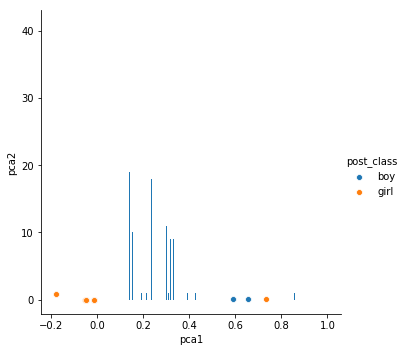

0.19611613513818407

In [86]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [87]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

In [88]:
for i in range(len(features)):
    print(dataset[i])

['230576336', 'dcard', 'girl', 'https', 'ios', 'ref', 'tw', 'www']
['是不是想害我心裡受創']
['很怕這個會導致口臭rrrrrr']
['btw有人要陪我聊天嘛']
['現在是尻的時候反而沒什麼舒服感覺只是單純射出來而已深怕自己是不是以前捏太緊讓龜頭壞掉qq不知道有沒有方法讓以前的敏感舒適度回來']
[]
[]
[]
['如題', '小弟我是家因的希望有人可以分享一下感想', '想知道裡面的環境對役男友善嗎', '有沒有哪位大大在新竹看守所當過替代役', '看ptt近幾年都沒有人po新竹看守所的文章']
['各位30cm給個意見rrr']
[]
[]
[]
[]
[]
[]
[]
['只有時間', '可是上面沒顯示我的名字', '我只有剩下網路可以查詢我申請代檢的醫院', '該如何是好', '請問各位30cm的大大們']
[]
['只要某些app的文章出來', '還有']
['cc', 'fhpoxx', 'fsojux', 'fxeh9x', 'https', 'ppt']
[]
[]
['一些台女到一定年齡後', '像賓士c300', '先打卡ktv', '全都po酒照', '又再次po文', '大多是精蟲上腦的宅男', '奶照', '學歷也不好', '寫不出有內容的文章', '每次我都會在唉居不然就fb', '沒新鮮感', '沒有好男人都是渣男qq', '然後裝的很有行情', '生活太單調', '發現沒露奶ig的愛心明顯下降了', '看到有些89妹在那邊po說自己沒有遇到好男人', '粉絲來了', '粉絲又流失了', '訂閱多了', '貼個奶', '越穿越露', '越脫越少', '還有po自己奶照', '長輩見客久了']
['0088t報到']
['因為diy的時候也是一次就覺得很夠了']
[]
['有男生跟我一樣覺得跟女朋友講電話是一件麻煩的事情嗎qq']
[]
['a同學', 'btw也可以先去看一下之前發的', 'btw順便推一下', 'but', 'b同學', 'kinoko', 'part1在這裡', 'part2', 'part2來了', 'part2在這裡', 'part3', 's我並不是只跟他交朋友', 'xddddd', 'キノコ', '上一篇part1的回應有點多xd'

In [95]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pandas.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = data['title']

In [96]:
graph.head()

title,台女的最愛,被逼著要吹乾頭髮,#問 #身體分泌物,天冷泡湯,敏感度回得去嗎？,手動刮鬍刀 v.s. 電動刮鬍刀 都幾？,當兵台中成功嶺陸軍,問 桃園後勤訓練中心,新竹看守所家因,西門町美食推薦,...,男友叫異性豬,Anna Dolly特賣會 福利品分享,我的初戀...,顏文字,#揪團 女孩版二手市集,做服務學習 被慈善團體主管欺負,#精品 LV Gucci YSL 錢包 請益 推薦 新手,買新的機車很浪費錢嗎？,#圖 #台南花喫靜苑 超棒的#浴衣體驗,毛孔粗大 有人有雷射經驗嗎
0088t報到,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12k,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14k,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18k,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
230576336,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
apriori(graph, min_support=minsup, use_colnames=True)

,support,itemsets
0,0.030534,(台女的最愛)
1,0.019084,(新竹看守所家因)
2,0.019084,(關於兵單體檢)
3,0.022901,(哪一種是你們的菜??)
4,0.091603,(淺談89妹)
5,0.229008,(如何追到德國男友part2)
6,0.171756,(如何追到德國男友part3)
7,0.080153,(只有我覺得低收養不起小孩嗎？)
8,0.038168,(#精品 Gucci Mormont supermini)
9,0.087786,(精品包包 MCM Berlin series handbag 花過天晴真矢愛莉包)


In [98]:
result = apriori(graph, min_support=minsup)
result

,support,itemsets
0,0.030534,(0)
1,0.019084,(8)
2,0.019084,(17)
3,0.022901,(20)
4,0.091603,(23)
5,0.229008,(29)
6,0.171756,(30)
7,0.080153,(31)
8,0.038168,(34)
9,0.087786,(35)


In [99]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [100]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(51),0.030534,0.061069,0.011450,0.375000,6.140625,0.009586,1.502290
1,(51),(0),0.061069,0.030534,0.011450,0.187500,6.140625,0.009586,1.193188
2,(29),(30),0.229008,0.171756,0.072519,0.316667,1.843704,0.033186,1.212065
3,(30),(29),0.171756,0.229008,0.072519,0.422222,1.843704,0.033186,1.334410


In [101]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(0),(51),0.030534,0.061069,0.011450,0.375000,6.140625,0.009586,1.502290,1
1,(51),(0),0.061069,0.030534,0.011450,0.187500,6.140625,0.009586,1.193188,1
2,(29),(30),0.229008,0.171756,0.072519,0.316667,1.843704,0.033186,1.212065,1
3,(30),(29),0.171756,0.229008,0.072519,0.422222,1.843704,0.033186,1.334410,1


In [107]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len


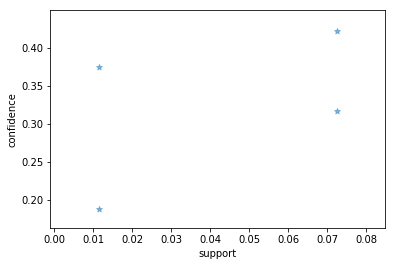

In [108]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [109]:
len(rules)
rules['antecedents'].head()

0     (0)
1    (51)
2    (29)
3    (30)
Name: antecedents, dtype: object

In [110]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(df)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

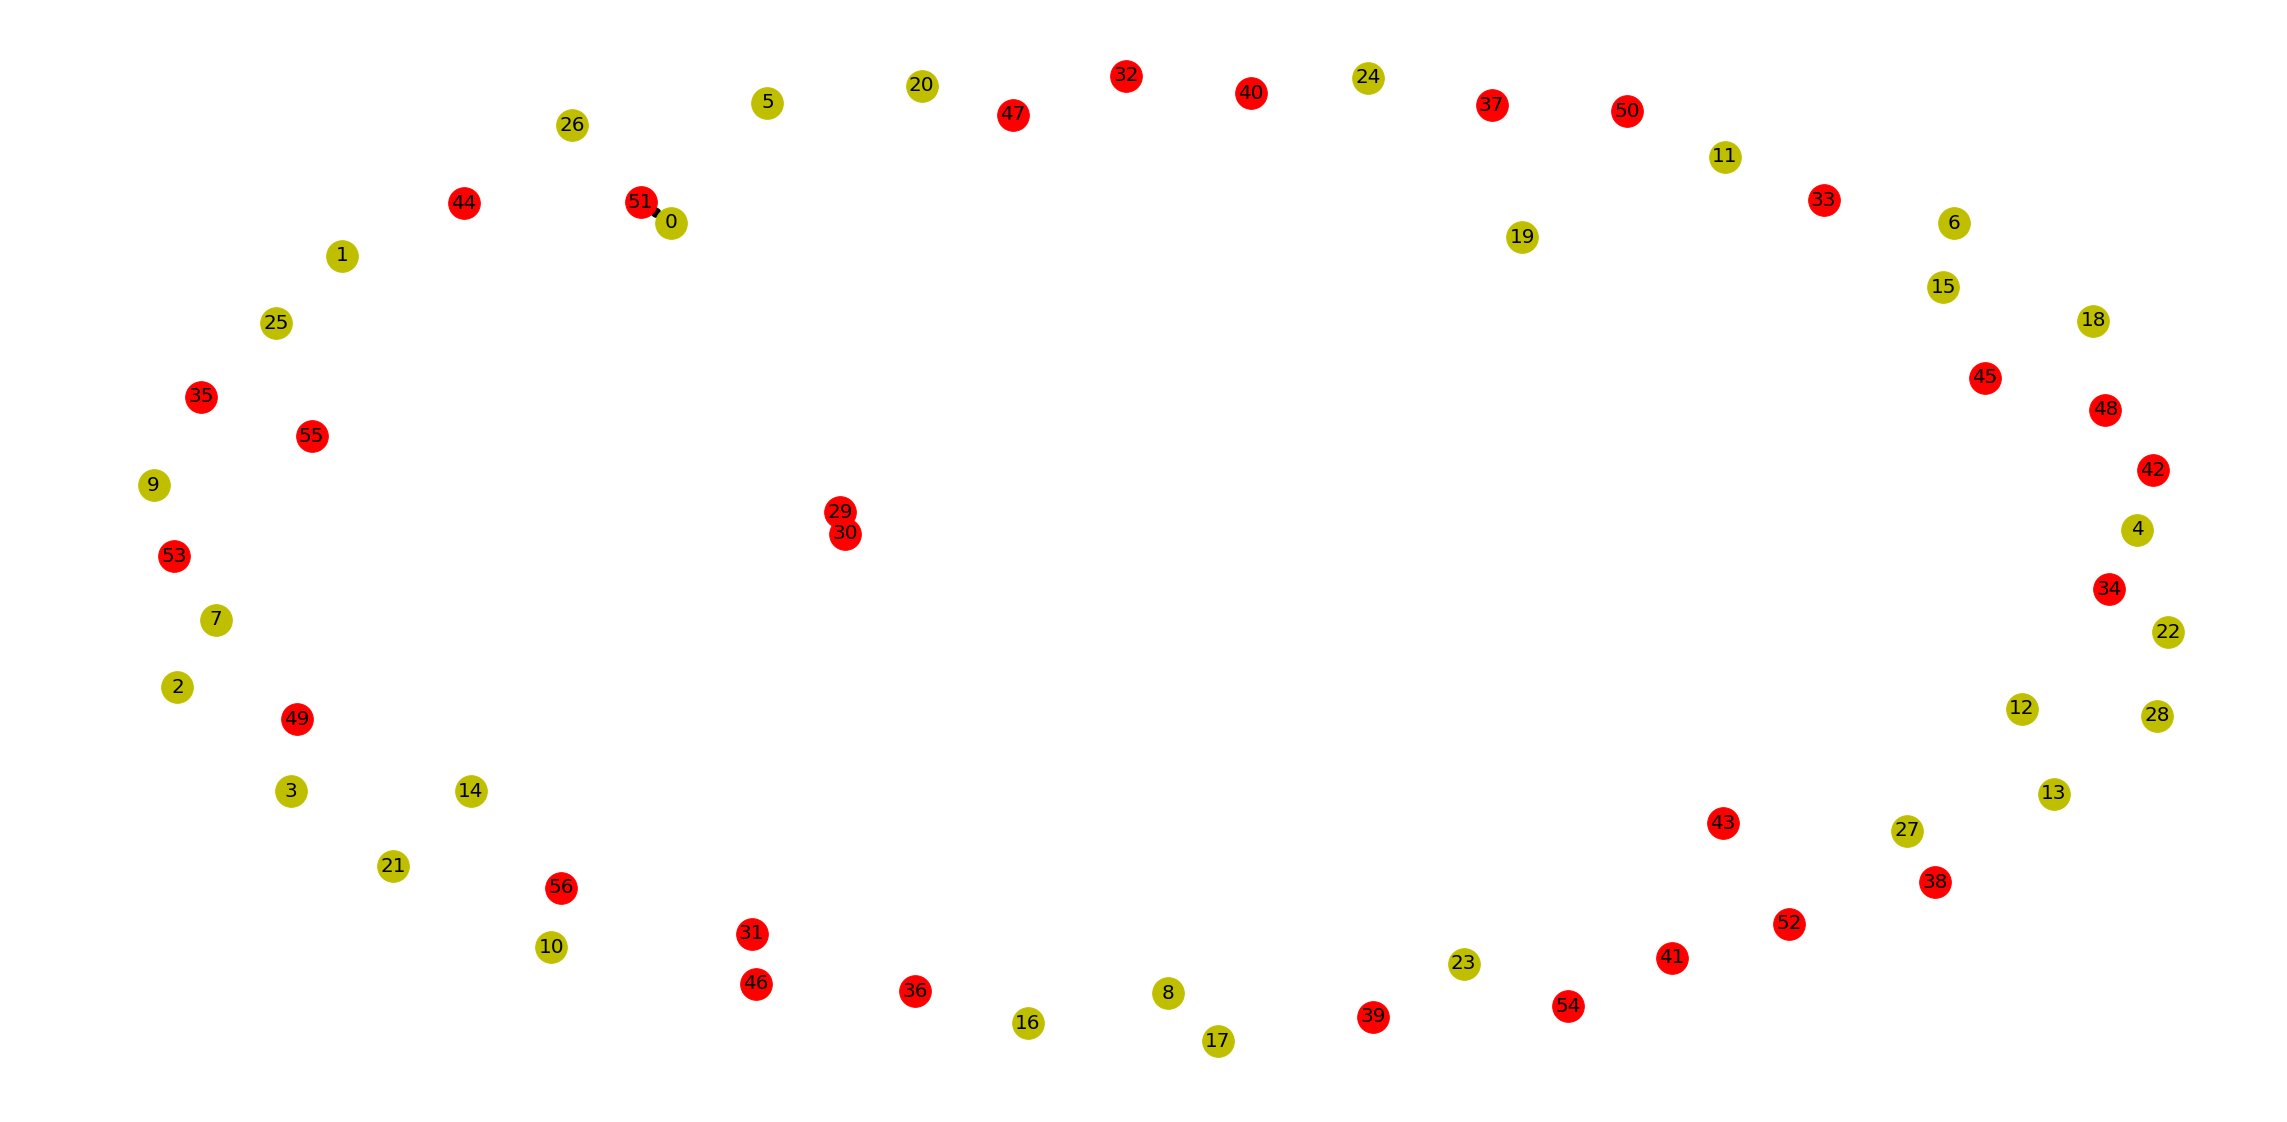

In [112]:
nodeListA = df.index[data['post_class'] == 'boy'].tolist()
nodeListB = df.index[data['post_class'] == 'girl'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="y", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display


In [113]:
print(list(nx.isolates(G)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56]


In [114]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(0, 51), (29, 30)}

In [115]:
pandas.DataFrame(data['title'])

,title
0,台女的最愛
1,被逼著要吹乾頭髮
2,#問 #身體分泌物
3,天冷泡湯
4,敏感度回得去嗎？
5,手動刮鬍刀 v.s. 電動刮鬍刀 都幾？
6,當兵台中成功嶺陸軍
7,問 桃園後勤訓練中心
8,新竹看守所家因
9,西門町美食推薦
